# Project Big Data 
## Hélène Lechêne, Marie Philippe, Claire Serraz & Romane Soler
## M2 D3S

This notebook classifies the customers of an airline company. They can be either be satisfied, either neutral/dissatisfied. First the data is imported and cleaned and then a neural network is used for the classification. 

# Part 0: Preliminary part

## 0.1. Libraries

In [ ]:
#Standard libraries
#!pip install viscm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Sklearn libraries
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split

## Tensorflow libraries
#!pip install tensorflow==2.0.0
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Activation, Embedding, Dense, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras import regularizers, callbacks, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## 0.2. Import data

The data is composed of two files: a test and train file. Since one doesn't know how the split between the train and test sets was done, the 2 files will be first combined and then splitted again in spark. 

In [ ]:
# Import test data
test = pd.read_csv('test.csv', sep=",")
test.head(10)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [ ]:
print('There are', np.shape(test)[0], 'comments and',
      np.shape(test)[1], 'variables in the test dataset.')


There are 25976 comments and 25 variables in the test dataset.


In [ ]:
# Import train data
train = pd.read_csv('train.csv', sep=",")
train.head(10)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [ ]:
print('There are', np.shape(train)[0], 'comments and',
      np.shape(train)[1], 'variables in the train dataset.')


There are 103904 comments and 25 variables in the train dataset.


In [ ]:
# Combine the two files
data_combined = pd.concat([test, train], axis=0)
data_combined


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
print('There are', np.shape(data_combined)[0], 'comments and',
      np.shape(data_combined)[1], 'variables in the combined dataset.')


There are 129880 comments and 25 variables in the combined dataset.


In [ ]:
# Checking the concatenation was well done
np.shape(test)[0] + np.shape(train)[0]


129880

In [ ]:
# Copy of the dataframe
df = data_combined.copy()


In [ ]:
# Set the column 'id' to index and delete the column unnamed (index of the csv)
df = df.set_index('id')
df.index.name = None
df = df.drop(df.columns[0], axis=1)
df


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


# Part 1: Cleaning data 

In [ ]:
# Drop the missing values
df = df.dropna(subset=['Arrival Delay in Minutes'])
df.shape


(129487, 23)

In [ ]:
# Drop values equal to 0 that are not applicable
df = df[df['Inflight wifi service'] != 0]
df = df[df['Departure/Arrival time convenient'] != 0]
df = df[df['Ease of Online booking'] != 0]
df = df[df['Gate location'] != 0]
df = df[df['Food and drink'] != 0]
df = df[df['Online boarding'] != 0]
df = df[df['Seat comfort'] != 0]
df = df[df['Inflight entertainment'] != 0]
df = df[df['On-board service'] != 0]
df = df[df['Leg room service'] != 0]
df = df[df['Baggage handling'] != 0]
df = df[df['Checkin service'] != 0]
df = df[df['Inflight service'] != 0]
df = df[df['Cleanliness'] != 0]
df


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
# Transforming string variables into numeric ones

df['Gender'] = df['Gender'].replace(['Female'], 1)
df['Gender'] = df['Gender'].replace(['Male'], 0)

df['Customer Type'] = df['Customer Type'].replace(['Loyal Customer'], 1)
df['Customer Type'] = df['Customer Type'].replace(['disloyal Customer'], 0)

df['Type of Travel'] = df['Type of Travel'].replace(['Business travel'], 1)
df['Type of Travel'] = df['Type of Travel'].replace(['Personal Travel'], 0)

df['Class Eco'] = np.where(df['Class'] == 'Eco', 1, 0)
df['Class Business'] = np.where(df['Class'] == 'Business', 1, 0)
df = df.drop(columns='Class')

df.head()


,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class Eco,Class Business
19556,1,1,52,1,160,5,4,3,4,3,...,5,5,2,5,5,50,44.0,satisfied,1,0
90035,1,1,36,1,2863,1,1,3,1,5,...,4,4,3,4,5,0,0.0,satisfied,0,1
36875,1,1,49,1,1182,2,3,4,3,4,...,2,2,4,2,4,0,20.0,satisfied,1,0
39177,0,1,16,1,311,3,3,3,3,5,...,3,1,1,2,5,0,0.0,satisfied,1,0
79433,1,1,77,1,3987,5,5,5,5,3,...,5,5,4,5,3,0,0.0,satisfied,0,1


# Part 2: Bonus Classification with Keras

In [ ]:
# Split into input (X) and output (Y) variables
X = df.iloc[:, np.r_[0:21, 22:24]].astype(float)
Y = df.iloc[:, 22]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
        X,
        Y,
        test_size=0.2,
        random_state=1234)


In [ ]:
encoder = LabelBinarizer()
encoder.fit(y_train)
y_train_encoded = encoder.transform(y_train)
y_train_encoded


array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# Binary Classification

# Baseline model
model = Sequential()
model.add(Dense(23, input_dim=23, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 23)                552       
                                                                 
 dense_3 (Dense)             (None, 1)                 24        
                                                                 
Total params: 576
Trainable params: 576
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
        x_train,
        y_train_encoded,
        epochs=15,
        batch_size=1024,
        verbose=1,
        validation_split=0.1)


Epoch 1/15
84/84 [==============================] - 1s 4ms/step - loss: 3.7804 - accuracy: 0.5979 - val_loss: 0.6167 - val_accuracy: 0.6759
Epoch 2/15
84/84 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.7342 - val_loss: 0.4776 - val_accuracy: 0.7854
Epoch 3/15
84/84 [==============================] - 0s 3ms/step - loss: 0.4348 - accuracy: 0.8204 - val_loss: 0.3902 - val_accuracy: 0.8590
Epoch 4/15
84/84 [==============================] - 0s 3ms/step - loss: 0.3619 - accuracy: 0.8786 - val_loss: 0.3306 - val_accuracy: 0.8927
Epoch 5/15
84/84 [==============================] - 0s 3ms/step - loss: 0.3082 - accuracy: 0.9144 - val_loss: 0.2890 - val_accuracy: 0.9098
Epoch 6/15
84/84 [==============================] - 0s 3ms/step - loss: 0.2657 - accuracy: 0.9363 - val_loss: 0.2474 - val_accuracy: 0.9442
Epoch 7/15
84/84 [==============================] - 0s 3ms/step - loss: 0.2326 - accuracy: 0.9494 - val_loss: 0.2180 - val_accuracy: 0.9538
Epoch 8/15
84/84 [==

In [ ]:
# Define function to display loss and accuracy evolution during training

def plot_history_multiclass(hist):
    plt.plot(hist.history['loss'], label='train')
    plt.plot(hist.history['val_loss'], label='val')
    plt.legend()
    plt.ylim((0, 1.5))
    plt.title('Loss evolution')
    plt.show()
    plt.plot(hist.history['accuracy'], label='train')
    plt.plot(hist.history['val_accuracy'], label='val')
    plt.legend()
    plt.ylim((0, 1))
    plt.title('Accuracy evolution')
    plt.show()


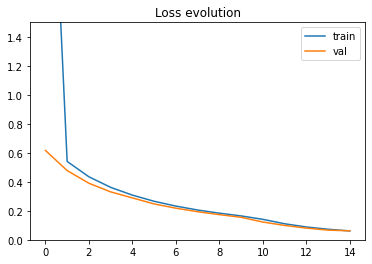

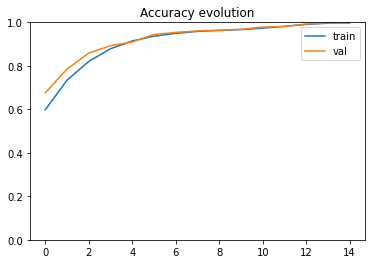

In [ ]:
plot_history_multiclass(history)


The loss and accuracy of the train and validation data evolve the same way. Furthermore, one may notice the losses are very close to 0 et the accuracy is very close to 1. Furthermore, it doesn't seem there is overfitting or underfitting since the train and validation curves are almost the same. 
Therefore, one may say this model works very well to predict the satisfaction of the customers, even thought it isn't complex. 